In [1]:
#Importing libraries for webscraping,wordcloud,sentiment,textblob etc.
import requests
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from collections import Counter
from bs4 import BeautifulSoup
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import random
from wordcloud import WordCloud
import os
import spacy
nlp = spacy.load('en_core_web_sm')
from textblob import TextBlob
import pattern


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\punkl\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\punkl\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
#Retriving data from URL and setting it to readable encoding
r1 = requests.get('https://www.newsy.com/stories/covid-cases-dropping-across-the-u-s-following-omicron-peak/') #Health news
r2 = requests.get('https://www.newsy.com/stories/u-s-military-faces-crisis-after-fuel-leak-poisons-water/') #Military news
r1.encoding = 'utf-8'
r2.encoding = 'utf-8'

In [3]:
#Extracting the data from the HTML page and printing it
html1 = r1.text
html2 = r2.text
print(html1[:500])

<!DOCTYPE html><html lang="en"><head><!-- Google Analytics --><script>
            (function(i,s,o,g,r,a,m){i['GoogleAnalyticsObject']=r;i[r]=i[r]||function(){
            (i[r].q=i[r].q||[]).push(arguments)},i[r].l=1*new Date();a=s.createElement(o),
            m=s.getElementsByTagName(o)[0];a.async=1;a.src=g;m.parentNode.insertBefore(a,m)
            })(window,document,'script','https://www.google-analytics.com/analytics.js','ga');

            ga('create', 'UA-5101570-1', 'auto');
    


In [4]:
#Using BeautifulSoup library to scrape the data and retrieve text
soup1 = BeautifulSoup(html1)
soup2 = BeautifulSoup(html2)
text1 = soup1.get_text()
text2 = soup2.get_text()
print(text1) #Looking at the text obtained

COVID Cases Dropping Across The U.S. Following Omicron Peak (VIDEO)

 newsynewsU.S. NewsWORLDPoliticsScience/HealthTechBusinessEntertainmentSportsinvestigationsdocumentariesshowsschedulewhere to watchCOVID Cases Dropping Across The U.S. Following Omicron PeakShareTweetEmailSMSCOVID Cases Dropping Across The U.S. Following Omicron PeakBy Newsy StaffBy Newsy StaffFebruary  5, 2022February  5, 2022The number of Americans in the hospital with COVID-19 has declined 15% since mid-January to about 124,000, Johns Hopkins data shows.More than 2,000 people are still dying from COVID-19, on average, every day.Deaths are a lagging indicator; as for COVID cases, there are signs of hope in the U.S. as they're down in nearly every state.Here's the latest from Johns Hopkins University, showing the numbers dropping off after the Omicron peak. That's leading some parts of the country to consider easing mask mandates. Denver just ended its indoor mask rule altogether. While health experts are happy with 

In [5]:
#Data Preprocessing
clean_text_1 = text1.replace("/n", " ")
clean_text_2 = text2.replace("/n", " ")
clean_text_1 = clean_text_1.replace("/", " ")
clean_text_2 = clean_text_2.replace("/", " ")
clean_text_1 = ''.join([c for c in clean_text_1 if c != "\'"])
clean_text_2 = ''.join([c for c in clean_text_2 if c != "\'"])
print(clean_text_1)

COVID Cases Dropping Across The U.S. Following Omicron Peak (VIDEO)

 newsynewsU.S. NewsWORLDPoliticsScience HealthTechBusinessEntertainmentSportsinvestigationsdocumentariesshowsschedulewhere to watchCOVID Cases Dropping Across The U.S. Following Omicron PeakShareTweetEmailSMSCOVID Cases Dropping Across The U.S. Following Omicron PeakBy Newsy StaffBy Newsy StaffFebruary  5, 2022February  5, 2022The number of Americans in the hospital with COVID-19 has declined 15% since mid-January to about 124,000, Johns Hopkins data shows.More than 2,000 people are still dying from COVID-19, on average, every day.Deaths are a lagging indicator; as for COVID cases, there are signs of hope in the U.S. as theyre down in nearly every state.Heres the latest from Johns Hopkins University, showing the numbers dropping off after the Omicron peak. Thats leading some parts of the country to consider easing mask mandates. Denver just ended its indoor mask rule altogether. While health experts are happy with the

In [6]:
#Splitting into sentences
sentence_1 = []
sentence_2 = []
tokens_1 = nlp(clean_text_1)
tokens_2 = nlp(clean_text_2)
for sent1 in tokens_1.sents:
    sentence_1.append((sent1.text.strip()))
for sent2 in tokens_2.sents:
    sentence_2.append((sent2.text.strip()))
print(sentence_1)

['COVID Cases Dropping Across The U.S. Following Omicron Peak (VIDEO)\n\n newsynewsU.S. NewsWORLDPoliticsScience HealthTechBusinessEntertainmentSportsinvestigationsdocumentariesshowsschedulewhere to watchCOVID Cases Dropping Across The U.S. Following Omicron PeakShareTweetEmailSMSCOVID Cases Dropping Across The U.S. Following Omicron PeakBy\xa0Newsy StaffBy\xa0Newsy StaffFebruary  5, 2022February  5, 2022The number of Americans in the hospital with COVID-19 has declined 15% since mid-January to about 124,000, Johns Hopkins data shows.', 'More than 2,000 people are still dying from COVID-19, on average, every day.', 'Deaths are a lagging indicator; as for COVID cases, there are signs of hope in the U.S. as theyre down in nearly every state.', 'Heres the latest from Johns Hopkins University, showing the numbers dropping off after the Omicron peak.', 'Thats leading some parts of the country to consider easing mask mandates.', 'Denver just ended its indoor mask rule altogether.', 'While he

In [7]:
#Sentimental analysis using textblob
textblob_sentiment_1 = []
textblob_sentiment_2 = []
for s1 in sentence_1:
    txt_1 = TextBlob(s1)
    a = txt_1.sentiment.polarity
    b = txt_1.sentiment.subjectivity
    textblob_sentiment_1.append([s1,a,b])
for s2 in sentence_2:
    txt_2 = TextBlob(s2)
    c = txt_2.sentiment.polarity
    d =  txt_2.sentiment.subjectivity
    textblob_sentiment_2.append([s2,c,d])

#Creating textblobs from generated textblob sentiments
df_textblob_1 = pd.DataFrame(textblob_sentiment_1, columns =['Sentence', 'Polarity', 'Subjectivity'])
df_textblob_2 = pd.DataFrame(textblob_sentiment_2, columns =['Sentence', 'Polarity', 'Subjectivity'])



Sentiment For Health News
Positive                     30
Neutral                      23
Negative                     10
dtype: int64


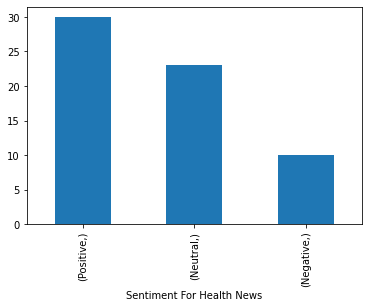

In [23]:
#If sentimental score is > 1 then 'Positive' sentiment
#If sentimental score is < 1 then 'Negative' sentiment
#If sentimental score is = 0 then 'Neutral' sentiment

#Using same text blobs variables for Polarity to get sentimental values
#Sentiment values for Health News -
polarity_scores_1 = []
for i in df_textblob_1['Polarity']:
    if i > 0:
        polarity_scores_1.append("Positive")
    elif i < 0:
        polarity_scores_1.append("Negative")
    else:
        polarity_scores_1.append("Neutral")
polarity_scores_1 = pd.DataFrame(polarity_scores_1,columns=['Sentiment For Health News'])
sentimental_score_1 = polarity_scores_1.value_counts().plot.bar()
sentimental_score_1 = polarity_scores_1.value_counts()
print(sentimental_score_1)
#Result is majorly Positive sentiment

Sentiment For Military News
Neutral                        37
Positive                       19
Negative                       10
dtype: int64


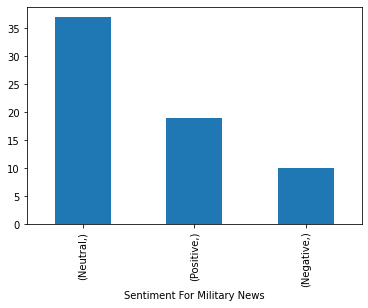

In [24]:
#Sentiment values for Military news -
polarity_scores_2 = []
for i in df_textblob_2['Polarity']:
    if i > 0:
        polarity_scores_2.append("Positive")
    elif i < 0:
        polarity_scores_2.append("Negative")
    else:
        polarity_scores_2.append("Neutral")

polarity_scores_2 = pd.DataFrame(polarity_scores_2,columns=['Sentiment For Military News'])
sentimental_score_2 = polarity_scores_2.value_counts().plot.bar()
sentimental_score_2 = polarity_scores_2.value_counts()
print(sentimental_score_2)
#Result is majorly Neutral sentiment

Text(0.5, 6.79999999999999, 'Sentence Polarity (Textblob)')

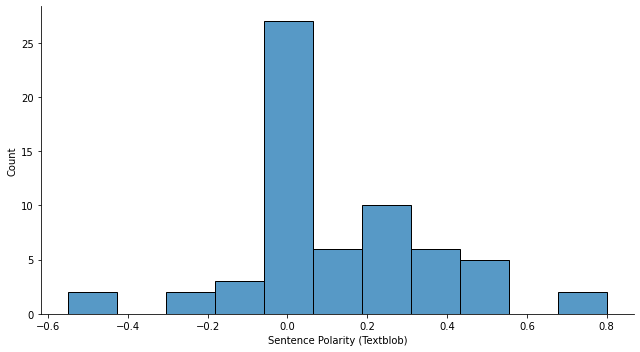

In [10]:
#Polarity for health news
#Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. 
sns.displot(df_textblob_1["Polarity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Polarity (Textblob)")
#Hence it shows that health news has positive sentiment (count of sentences at 0) and positive sentiment (count of sentences at 0.6) on the sentence polarity x axis. However, it is highly positive.

Text(0.5, 6.79999999999999, 'Sentence Polarity (Textblob)')

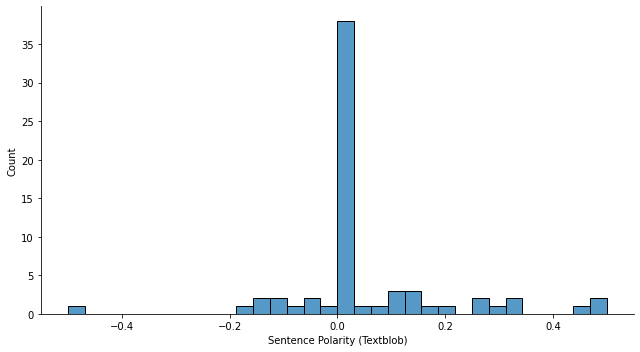

In [11]:
#Polarity for military news
#Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. 
sns.displot(df_textblob_2["Polarity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Polarity (Textblob)")
#Hence it shows that there is mixed sentiment with neutral, negative and positive sentences on the sentence polarity x axis.

Text(0.5, 6.79999999999999, 'Sentence Subjectivity (Textblob)')

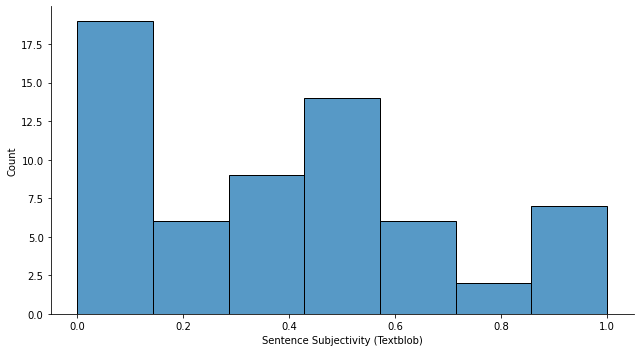

In [12]:
#Subjective sentences generally refer to personal opinion, emotion or judgment.
#Subjectivity is also a float which lies in the range of [0,1].
sns.displot(df_textblob_1["Subjectivity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Subjectivity (Textblob)")
#Opinions are mixed.

Text(0.5, 6.79999999999999, 'Sentence Subjectivity (Textblob)')

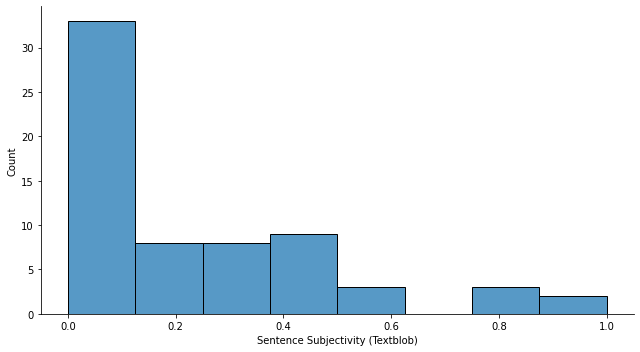

In [13]:
#Subjective sentences generally refer to personal opinion, emotion or judgment.
#Subjectivity is also a float which lies in the range of [0,1].
sns.displot(df_textblob_2["Subjectivity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Subjectivity (Textblob)")
#Mostly restricted emotion over military news as compared to health news.

<h2>Plots and WordCloud</h2>

In [14]:
clean_text_1[100:300]

'sScience HealthTechBusinessEntertainmentSportsinvestigationsdocumentariesshowsschedulewhere to watchCOVID Cases Dropping Across The U.S. Following Omicron PeakShareTweetEmailSMSCOVID Cases Dropping Ac'

In [15]:
#Creating the tokenizer and tokenizing the text
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
tokens_1 = tokenizer.tokenize(clean_text_1)
tokens_2 = tokenizer.tokenize(clean_text_2)
print(tokens_1[0:20])

['COVID', 'Cases', 'Dropping', 'Across', 'The', 'U', 'S', 'Following', 'Omicron', 'Peak', 'VIDEO', 'newsynewsU', 'S', 'NewsWORLDPoliticsScience', 'HealthTechBusinessEntertainmentSportsinvestigationsdocumentariesshowsschedulewhere', 'to', 'watchCOVID', 'Cases', 'Dropping', 'Across']


In [16]:
#Looping through the tokens and make them lower case for uniformity
words_1 = []
words_2 = []
for word1 in tokens_1:
    words_1.append(word1.lower())
for word2 in tokens_2:
    words_2.append(word2.lower())

In [17]:
#Removing stop words from the words that we changed to lowercase
#Stop words are a set of commonly used words in any language. 
#For example, in English, “the”, “is” and “and”, would easily qualify as stop words. 
stopwords = nltk.corpus.stopwords.words('english')
words_new_1 = []
words_new_2 = []

#Appending to words_new all words that are in words but not in stopwords
for word_1 in words_1:
    if word_1 not in stopwords:
        words_new_1.append(word_1)
for word_2 in words_2:
    if word_2 not in stopwords:
        words_new_2.append(word_2)
print(words_new_1[0:10])

['covid', 'cases', 'dropping', 'across', 'u', 'following', 'omicron', 'peak', 'video', 'newsynewsu']


In [18]:
#Frequency distribution of the words
freq_dist_1 = nltk.FreqDist(words_new_1)
freq_dist_2 = nltk.FreqDist(words_new_2)

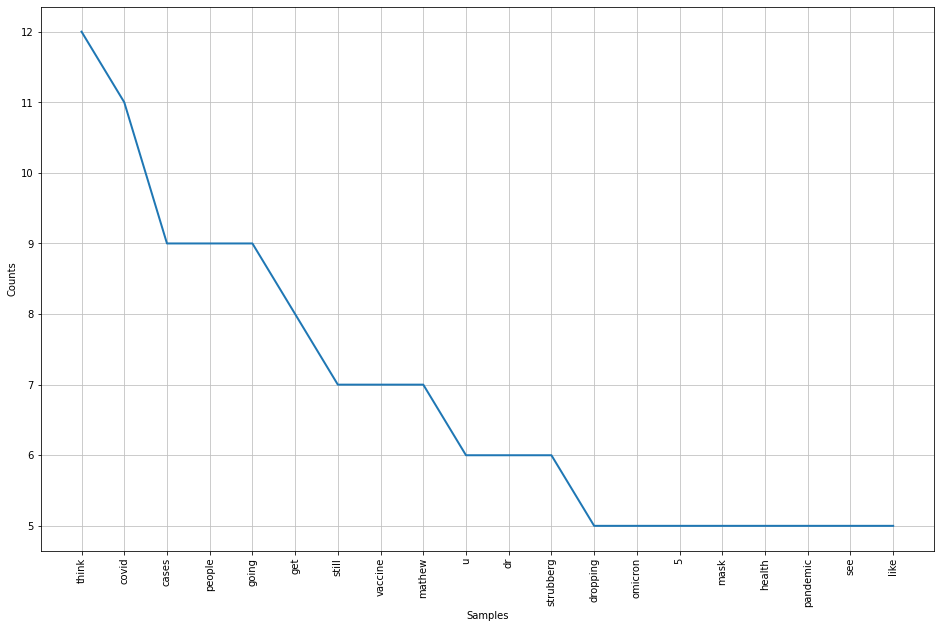

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [19]:
#Plot for health news cleaned word frequency
plt.subplots(figsize=(16,10))
freq_dist_1.plot(20)

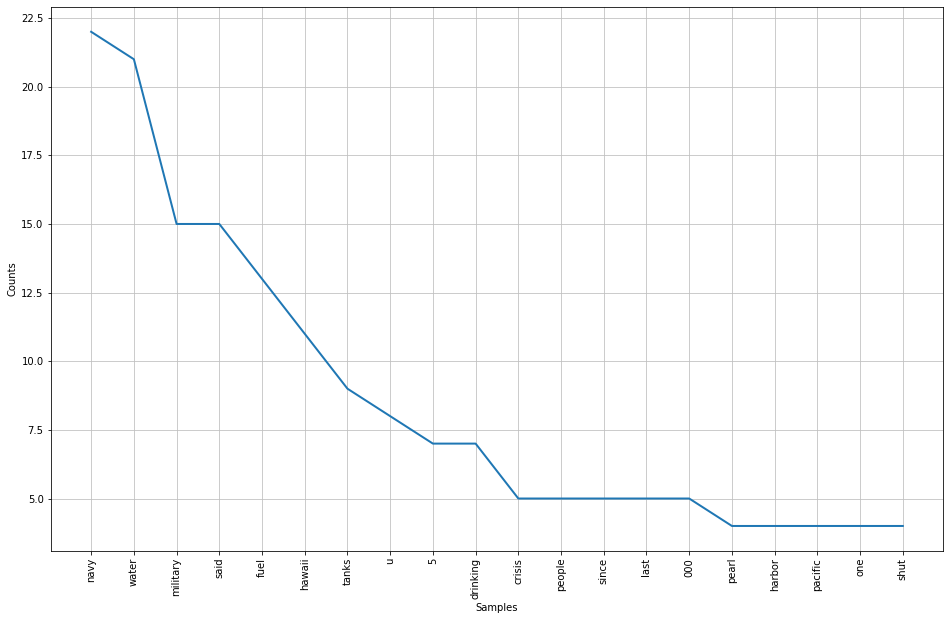

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [20]:
#Plot for military news cleaned word frequency
plt.subplots(figsize=(16,10))
freq_dist_2.plot(20)

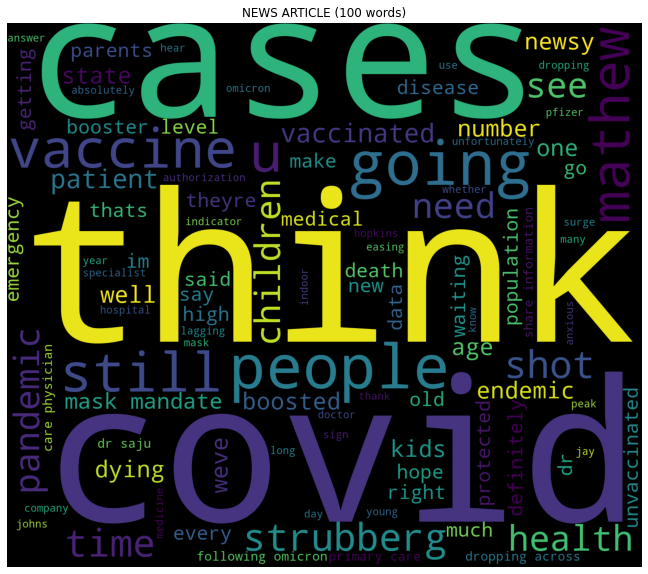

In [21]:
#Word cloud generation for health news
#The larger the words on the wordcloud, the higher is the frequency of the words
res1 = ' '.join([i for i in words_new_1 if not i.isdigit()]) 
plt.subplots(figsize=(16,10))
wordcloud = WordCloud(
                          background_color='black',
                          max_words=100,
                          width=1400,
                          height=1200
                         ).generate(res1)


plt.imshow(wordcloud)
plt.title('NEWS ARTICLE (100 words)')
plt.axis('off')
plt.show()

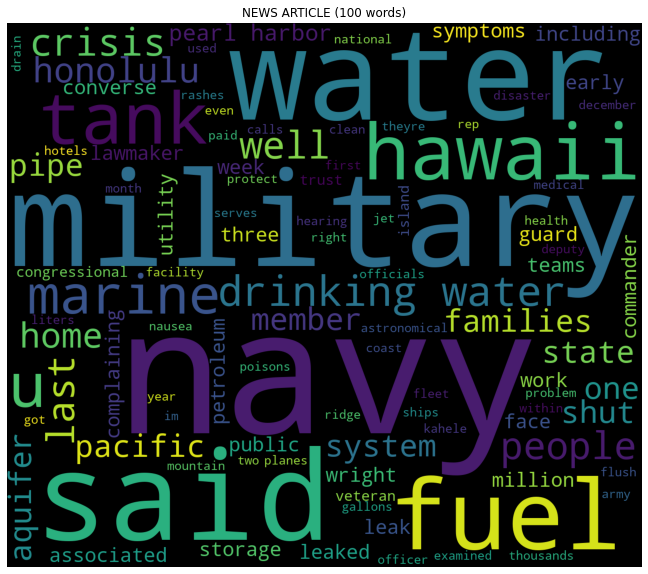

In [22]:
#Word cloud generation for military news
#The larger the words on the wordcloud, the higher is the frequency of the words
res2 = ' '.join([i for i in words_new_2 if not i.isdigit()])
plt.subplots(figsize=(16,10))
wordcloud = WordCloud(
                          background_color='black',
                          max_words=100,
                          width=1400,
                          height=1200
                         ).generate(res2)


plt.imshow(wordcloud)
plt.title('NEWS ARTICLE (100 words)')
plt.axis('off')
plt.show()